# Lecture 2:  the Backpropagation method

Author: Christopher Monterola

Copyright © 2021 Christopher Monterola. All rights reserved.

This notebook is being written as part of a book on Deep Learning. None of the content here shall be reproduced and/or distributed without the written permission of the author. 

---

## Executive Summary

This notebook summarizes the basic mathematical principles  you need to understand to implement back-propagation in training neural networks, namely:   

1. Understanding sigmoid or step-like functions.
2. Using the gradient descent method for backpropagation.
3. Demonstration of backpropation method for a three-layer feedforward neural networks.

Each of the above components are illustrated using examples. 


# 1. Sigmoid Functions


![logistic-curve](https://user-images.githubusercontent.com/25600601/133036350-3270d0b3-c381-4a1d-a6ce-014e7feb2f54.png)

Sigmoid Functions are mathematical functions that follow the characteristic "S" curve. The function has many forms, but the most general form is the logistic equation given by:

\begin{equation}
f(x) = \frac{A}{1 + e^{-k(x-x_o)}}
\end{equation}

where $A$ is the maximum value, $x_o$ is the location of the midpoint, and $k$ is the steepness. In essence, sigmoids are defined by two horizontal asymptotes. This is why they are often used in learning curves, activation functions, and other growth models that exhibit an approximately exponential increase that saturates at a certain limit. Other sigmoid functions include:

- hyperbolic tangent
- arc tangent
- error function
- generalised logistic function

![Gjl-t(x)](https://user-images.githubusercontent.com/25600601/133036472-0b528495-fd45-4d40-9407-888c6a81a7e4.png)

Sigmoid-like functions are the most used functions when training neural networks as (1) they provide good approximations to the step function (the characteristic distribution of an [*integrate-and-fire neuron*](https://en.wikipedia.org/wiki/Biological_neuron_model#Integrate-and-fire), and  (2) a sigmoid function has a **defined derivative** at the transition points. 

These two properties are important in the convergence of the so-called **gradient descent back-propagation method**, an optimization procedure that is arguably the most important mathematical procedure for training neural networks to learn patterns.

A *tour de force* in neural network involves finding the optimal sigmoid function defined as a function that will be able to **avoid local minima** and at the same time gives the **fastest convergence**. The exact function resulting from this long mathematical debate and countless simulations has the form:


\begin{equation}
f(x) = 1.7159 \tanh {\frac{2x}{3}}
\end{equation}


Eventually, series of numerical and theoretical analysis indicates that a Rectifield Linear Unit or RELU function creates a more generalizable result and faster convergence mainly because it **preserves information about relative intensities as compared to sigmoid like functions.** This is a breakthrough article in 2010 by [Nair and Hinton](https://www.researchgate.net/publication/221345737_Rectified_Linear_Units_Improve_Restricted_Boltzmann_Machines_Vinod_Nair) and an intuitive explanation for the above can be [sourced here](https://towardsdatascience.com/if-rectified-linear-units-are-linear-how-do-they-add-nonlinearity-40247d3e4792).



---
**Illustration 1: Home Exercise (discussion to be lead by Cedric/Gilbert, *et al* outside our sessions)** 

You have observed that the growth of a bacteria culture with limited nutrients is a logistic function. You find the equation for the growth to be:
\begin{equation}
f(t) = \frac{1000}{1 + e^{-0.5t+6}}
\end{equation}

where $t$ is the time in hours.

What is the population after 15 hours?

> Solving for t = 15,  

>$ f(15) = \frac{1000}{1 + e^{-0.5(15)+6}}$  

>$ f(15) = \frac{1000}{1 + e^{-1.5}} $  

>$ f(15) \approx{} 817.57 $

Implement the above calculation using numpy, see cell below, and validate by getting a value of 817.57.

In [1]:
## We're preloading all libraries used in this notebook

import random
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
# Define the variables here

A, k, x0, x = 1000, .5, 12, 15

sigmoid= A/(1+np.exp(-k*(x-x0)))

print(sigmoid)

817.5744761936436



---
**Illustration 2. Home exercise, practice your derivative**: 
    
Show that the derivative of f(x) = $\frac{1}{1 + e^{-k(x)}}$ can be written as f'(x)= k f(x) (1-f(x)).

![Der_Sigmoid](https://user-images.githubusercontent.com/25600601/133036959-9a8c6f0b-5fd3-4c4f-9f96-02d6be8e140d.jpg)




# 2. Your first neural network using Newton's gradient descent method. 

Let us now combine everything you learned in the first session and the above properties of a sigmioid function to build your first neural network. Consider the figure below:

<img width="509" alt="neuron" src="https://user-images.githubusercontent.com/25600601/132207818-802ad5be-865c-40c2-bbd8-3da3e86b1217.png">


**STEP 1: Forward Propagation**

The functional mapping from inputs ($x_1, x_2$) to output $\Psi_{NN}$ is given by: 
   
   
$\Psi_{NN} = g(x_1, x_2) = g(w_1f(x_1) + w_2f(x_2))$
   
      
where $w_1$ and $w_2$ are the weights, $f$ and $g$ are the activation functions of the input and the output layers respectively.

If you want the system to learn a mapping from $\Psi_{NN}$ to $\Psi_{actual}$ then your goal is to minimize the error function $E$ given by:

**STEP 2: Define the error function**

\begin{equation}
E = \frac{1}{2} (\Psi_{NN} -\Psi_{actual})^2
\end{equation}
  

by updating or evolving $w_1$ and $w_2$.  Combining all the mathematics and numerical procedure you learn above, you can derive that the update rule should be:

**STEP 3: Implement Gradient Descent**

\begin{equation}
w_1^{t+1} = w_1^t - \gamma \frac{\partial E}{\partial w_1^t }
\end{equation}

\begin{equation}
w_2^{t+1} = w_2^t - \gamma \frac{\partial E}{\partial w_2^t }
\end{equation}

**STEP 4: Simplify the result**

\begin{equation}
w_1^{t+1} = w_1^t - \gamma(\Psi_{NN} -\Psi_{actual}) g'(x_1,x_2) f(x_1)
\end{equation}

\begin{equation}
w_2^{t+1} = w_2^t - \gamma(\Psi_{NN} -\Psi_{actual}) g'(x_1,x_2) f(x_2)
\end{equation}


noting that $g'(x) = g(x) (1-g(x))$, we get:

\begin{equation}
w_1^{t+1} = w_1^t - \gamma(\Psi_{NN} -\Psi_{actual})(g)(1-g)f(x_1)
\end{equation}

\begin{equation}
w_2^{t+1} = w_2^t - \gamma(\Psi_{NN} -\Psi_{actual})(g)(1-g)f(x_2)
\end{equation}

where $\gamma$ is referred to as the learning rate.



# Example 1. *Biased node*. Train the above two layer network to implement the following rules:   

| $x_1$ | $x_2$ | $\Psi_{actual}$ |
| --- | --- | --- |
|-1 | -1 | 0 |
|-1 | 1 | 1 |
| 1 | -1 | 0 |
| 1 | 1 | 1 |

that is, if $(x_1, x_2) = (1, 1)$ or (-1, 1) then $\Psi_{actual} =1$      
else if $(x_1, x_2) = (-1, -1)$ or (1, -1) then $\Psi_{actual} =0$


Shown below is a verbose code to explicitly demonstrate the backpropagation implementation.

In [41]:
#INPUT OUTPUT MAPS
x1=[-1,-1,1,1]
x2=[-1,1,-1,1]
Psi_actual=[0,1,0,1]

#Initial weights and learning rate
cur_w1 = .01 
cur_w2= .01
gamma = .5
gradG_w1=0
gradG_w2=0

#PARAMETERS

iteration=0
total_iteration =1000
error = []
weight1 = []
weight2= []

#ACTIVATION FUNCTIONS

def f(x):
    return x
def df(x):
    return 1
def g(x):
    return 1/(1+np.exp(-(x)))
def dg(x):
    return g(x)*(1-g(x))

#OUTPUT of the NN and the Error function
def Psi_NN(xx1, xx2, w1, w2):
    return g(w1*f(xx1)+w2*f(xx2))
def E(xx1,xx2, w1, w2, Psi_actual):
    return Psi_NN(xx1, xx2, w1, w2)-Psi_actual


while iteration < total_iteration:
    
    i= random.randint(0,3)
    prev_w1 = cur_w1 
    prev_w2 = cur_w2
    
    #ERROR TERM
    gradG_w1= E(x1[i],x2[i], cur_w1, cur_w2, Psi_actual[i])*dg(cur_w1*f(x1[i])+cur_w2*f(x2[i]))*f(x1[i])
    gradG_w2= E(x1[i],x2[i], cur_w1, cur_w2,Psi_actual[i])*dg(cur_w1*f(x1[i])+cur_w2*f(x2[i]))*f(x2[i])
    #print(cur_w1, cur_w2) #See how the weight evolves
 
    #RECORD THE ERROR AND THE WEIGHTS  
    error.append(abs(E(x1[i],x2[i], cur_w1, cur_w2,Psi_actual[i])))
    weight1.append(cur_w1)
    weight2.append(cur_w2)

    #BACKPROPAGATE THE ERROR
    cur_w1 -= gamma *gradG_w1
    cur_w2 -= gamma *gradG_w2
    NN = Psi_NN(x1[i], x2[i], cur_w1, cur_w2)
    
    #See how the mapping evolves
    print("iter=%d" %iteration, "x1=%d" % x1[i]," x2=%d" % x2[i] , "Psi_actual=%d" % Psi_actual[i],"Psi_NN=%.2f" %NN)
    iteration +=1

print("Total iteration=", iteration)

iter=0 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.53
iter=1 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.56
iter=2 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.46
iter=3 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.41
iter=4 x1=1  x2=1 Psi_actual=1 Psi_NN=0.56
iter=5 x1=1  x2=1 Psi_actual=1 Psi_NN=0.59
iter=6 x1=1  x2=1 Psi_actual=1 Psi_NN=0.61
iter=7 x1=1  x2=1 Psi_actual=1 Psi_NN=0.64
iter=8 x1=1  x2=1 Psi_actual=1 Psi_NN=0.65
iter=9 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.39
iter=10 x1=1  x2=1 Psi_actual=1 Psi_NN=0.67
iter=11 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.37
iter=12 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.31
iter=13 x1=1  x2=1 Psi_actual=1 Psi_NN=0.70
iter=14 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.28
iter=15 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.65
iter=16 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.27
iter=17 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.33
iter=18 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.26
iter=19 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.31
iter=20 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.30
iter=21 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.71
iter=22 x1=1  x2=-1 Ps

iter=378 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.94
iter=379 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.94
iter=380 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.06
iter=381 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.06
iter=382 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.94
iter=383 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.06
iter=384 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.94
iter=385 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.06
iter=386 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.94
iter=387 x1=1  x2=1 Psi_actual=1 Psi_NN=0.94
iter=388 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.05
iter=389 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.06
iter=390 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.94
iter=391 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.05
iter=392 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.05
iter=393 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.94
iter=394 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.05
iter=395 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.94
iter=396 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.94
iter=397 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.05
iter=398 x1=1  x2=1 Psi_actual=1 Psi_NN=0.95
iter=399 x1=-1  x2=1 Psi_act

iter=841 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.04
iter=842 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.96
iter=843 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.96
iter=844 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.04
iter=845 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.96
iter=846 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.96
iter=847 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.04
iter=848 x1=-1  x2=-1 Psi_actual=0 Psi_NN=0.04
iter=849 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.96
iter=850 x1=1  x2=1 Psi_actual=1 Psi_NN=0.96
iter=851 x1=1  x2=1 Psi_actual=1 Psi_NN=0.96
iter=852 x1=1  x2=1 Psi_actual=1 Psi_NN=0.96
iter=853 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.04
iter=854 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.04
iter=855 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.96
iter=856 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.96
iter=857 x1=-1  x2=1 Psi_actual=1 Psi_NN=0.96
iter=858 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.04
iter=859 x1=1  x2=-1 Psi_actual=0 Psi_NN=0.04
iter=860 x1=1  x2=1 Psi_actual=1 Psi_NN=0.96
iter=861 x1=1  x2=1 Psi_actual=1 Psi_NN=0.96
iter=862 x1=1  x2=-1 Psi_actual=0 Ps

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


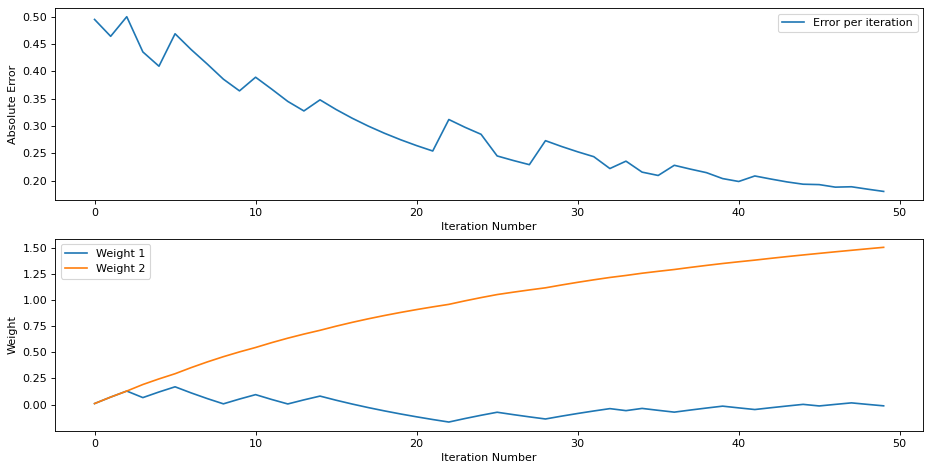

In [4]:
figure(num=None, figsize=(14, 7), dpi=80, facecolor='w', edgecolor='k')

iteration_index = range(0, total_iteration)
plt.figure(1)

plt.subplot(211)    
plt.plot(iteration_index, error, label="Error per iteration")
plt.ylabel("Absolute Error")
plt.xlabel("Iteration Number")
plt.legend()

plt.subplot(212) 
plt.plot(iteration_index, weight1, label="Weight 1")
plt.plot(iteration_index, weight2, label="Weight 2")
plt.ylabel("Weight")
plt.xlabel("Iteration Number")
plt.legend()


plt.show()

### Now let us do this for different learning parameters ...

In [5]:
#Biased
x1=[-1,-1,1,1]
x2=[-1,1,-1,1]
Psi_actual=[0,1,0,1]

#AND
#x1=[-1,-1,1,1]
#x2=[-1,1,-1,1]
#Psi_actual=[1,1,1,0]


#Initial weights and learning rate

gamma_param = [-.01, -.03, -.1, -.2, -.5]   # Learning rate
#gamma =-.2
gradG_w1=0
gradG_w2=0

#PARAMETERS
index=-1
index_total=5
total_iteration =15000
error_list = [[]for _ in range(index_total)]
weight1_list = [[]for _ in range(index_total)]
weight2_list= [[]for _ in range(index_total)]
Output_actual0= [[]for _ in range(index_total)]
Output_NN0= [[]for _ in range(index_total)]
Output_actual1= [[]for _ in range(index_total)]
Output_NN1= [[]for _ in range(index_total)]
Output_actual2= [[]for _ in range(index_total)]
Output_NN2= [[]for _ in range(index_total)]
Output_actual3= [[]for _ in range(index_total)]
Output_NN3= [[]for _ in range(index_total)]

def f(x):
    return x
def g(x):
    return 1/(1+np.exp(-(x)))
def df(x):
    return 1
def dg(x):
    return g(x)*(1-g(x))
def Psi_NN(xx1, xx2, w1, w2):
    return g(w1*f(xx1)+w2*f(xx2))
def E(xx1,xx2, w1, w2, Psi_actuall):
    return Psi_NN(xx1, xx2, w1, w2)-Psi_actuall

for gamma in gamma_param:
    index=index+1
    iteration=0
    cur_w1, cur_w2 =.01,.01
    while iteration < total_iteration:

        i= random.randint(0,3)
        prev_w1 = cur_w1 
        prev_w2 = cur_w2

        #ERROR TERM
        gradG_w1= E(x1[i],x2[i], cur_w1, cur_w2, Psi_actual[i])*dg(cur_w1*f(x1[i])+cur_w2*f(x2[i]))*f(x1[i])
        gradG_w2= E(x1[i],x2[i], cur_w1, cur_w2,Psi_actual[i])*dg(cur_w1*f(x1[i])+cur_w2*f(x2[i]))*f(x2[i])
        #print(cur_w1, cur_w2) #See how the weight evolves

        #RECORD THE ERROR AND THE WEIGHTS  
        
        #arr.append([])
        error_list[index].append(abs(E(x1[i],x2[i], cur_w1, cur_w2,Psi_actual[i])))
        weight1_list[index].append(cur_w1)
        weight2_list[index].append(cur_w2)
        
        if i==0:
            Output_NN0[index].append(Psi_NN(x1[i], x2[i], cur_w1, cur_w2))
            Output_actual0[index].append(Psi_actual[i])
        if i==1:
            Output_NN1[index].append(Psi_NN(x1[i], x2[i], cur_w1, cur_w2))
            Output_actual1[index].append(Psi_actual[i])     
        if i==2:
            Output_NN2[index].append(Psi_NN(x1[i], x2[i], cur_w1, cur_w2))
            Output_actual2[index].append(Psi_actual[i])   
        if i==3:
            Output_NN3[index].append(Psi_NN(x1[i], x2[i], cur_w1, cur_w2))
            Output_actual3[index].append(Psi_actual[i])   
            
        #print("error", error[index])
        #BACKPROPAGATE THE ERROR
        cur_w1 += gamma *gradG_w1
        cur_w2 += gamma *gradG_w2
        #NN = Psi_NN(x1[i], x2[i], cur_w1, cur_w2)


        #See how the mapping evolves
        #print("iter=%d" %iteration, "x1=%d" % x1[i]," x2=%d" % x2[i] , "Psi_actual=%d" % Psi_actual[i],"Psi_NN=%.2f" %NN)
        iteration +=1




## Error and change of weights VS iterations

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


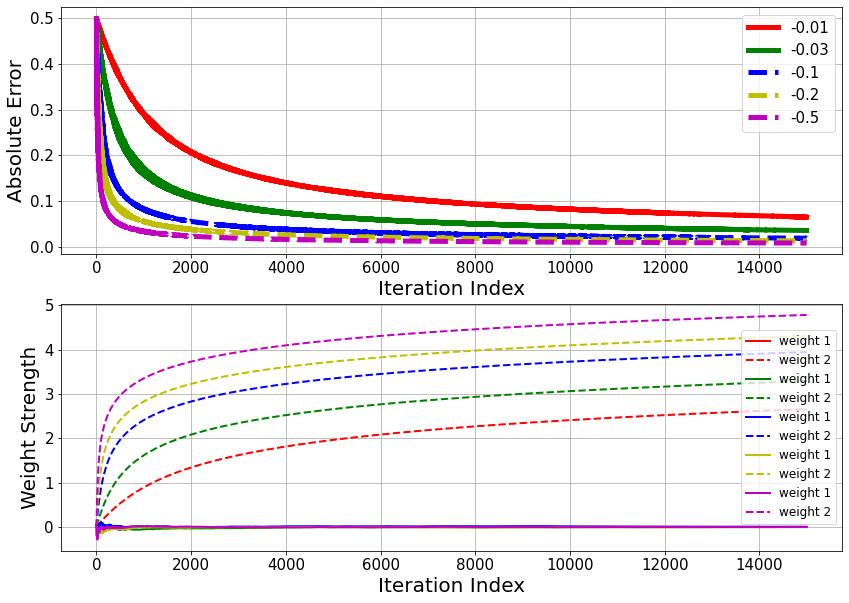

In [6]:
iter = np.arange(0, total_iteration, 1)
iter2= np.arange(0, 20, 1)

main_canvas = plt.figure(figsize = (14, 10))
plot_canvas = plt.subplot(2, 1, 1)

attrib = ["r-", "g-", "b--", "y--", "m--"]
for i in range(5):
    plot_canvas.plot(iter, error_list[i], attrib[i], lw = 5, label=gamma_param[i])
plot_canvas.grid(True)
#plot_canvas.set_title("ERROR PLOT", size = 15)
plot_canvas.set_xlabel(r"Iteration Index", size = 20)
plot_canvas.set_ylabel(r"Absolute Error", size = 20)
plot_canvas.tick_params(axis = "both", which = "both", labelsize = 15)
plt.legend(fontsize=15);

plot_canvas = plt.subplot(2, 1, 2)

attrib = ["r-", "g-", "b-", "y-", "m-"]
attrib2 = ["r--", "g--", "b--", "y--", "m--"]
for i in range(5):
    plot_canvas.plot(iter, weight1_list[i], attrib[i], lw = 2, label="weight 1")
    plot_canvas.plot(iter, weight2_list[i], attrib2[i], lw = 2, label="weight 2")
plot_canvas.grid(True)
#plot_canvas.set_title("ERROR PLOT", size = 15)
plot_canvas.set_xlabel(r"Iteration Index", size = 20)
plot_canvas.set_ylabel(r"Weight Strength", size = 20)
plot_canvas.tick_params(axis = "both", which = "both", labelsize = 15)
plt.legend(fontsize=12);


### Let's look on how the NN evolve to copy the ideal output

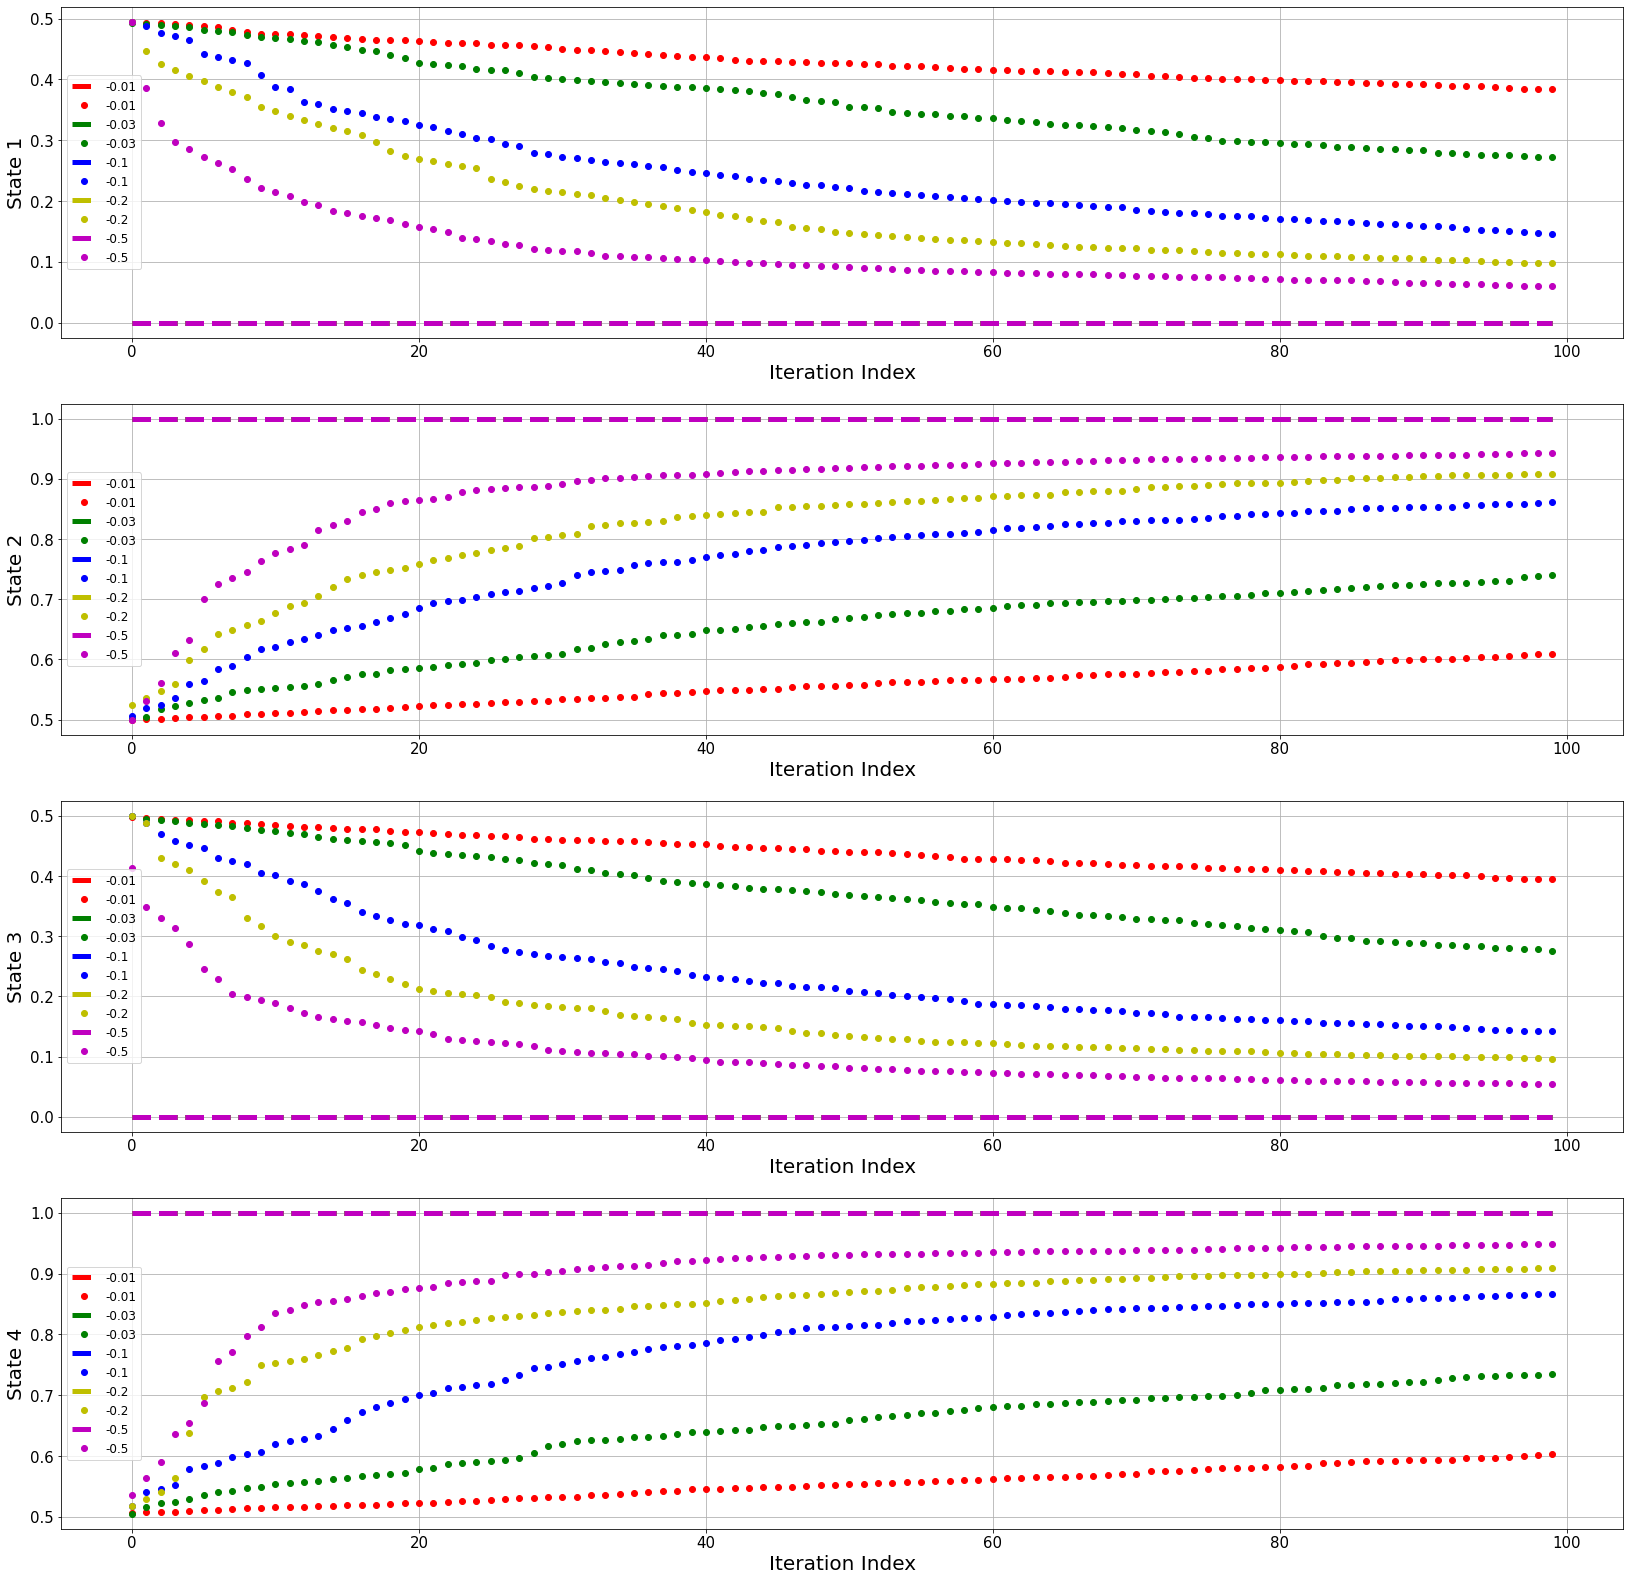

In [7]:
iter = np.arange(0, total_iteration, 1)
plot_length=100

main_canvas = plt.figure(figsize = (28, 28))


plot_canvas = plt.subplot(4, 1, 1)

attrib = ["r--", "g--", "b--", "y--", "m--"]
attrib2 = ["ro", "go", "bo", "yo", "mo"]
for i in range(5):
    plot_canvas.plot(iter[:plot_length], Output_actual0[i][:plot_length], attrib[i], lw = 5, label=gamma_param[i])
    plot_canvas.plot(iter[:plot_length], Output_NN0[i][:plot_length], attrib2[i], lw = 2, label=gamma_param[i])
plot_canvas.grid(True)
#plot_canvas.set_title("ERROR PLOT", size = 15)
plot_canvas.set_xlabel(r"Iteration Index", size = 20)
plot_canvas.set_ylabel(r"State 1", size = 20)
plot_canvas.tick_params(axis = "both", which = "both", labelsize = 15)
plt.legend(fontsize=12);

plot_canvas = plt.subplot(4, 1, 2)

attrib = ["r--", "g--", "b--", "y--", "m--"]
attrib2 = ["ro", "go", "bo", "yo", "mo"]
for i in range(5):
    plot_canvas.plot(iter[:plot_length], Output_actual1[i][:plot_length], attrib[i], lw = 5, label=gamma_param[i])
    plot_canvas.plot(iter[:plot_length], Output_NN1[i][:plot_length], attrib2[i], lw = 2, label=gamma_param[i])
plot_canvas.grid(True)
#plot_canvas.set_title("ERROR PLOT", size = 15)
plot_canvas.set_xlabel(r"Iteration Index", size = 20)
plot_canvas.set_ylabel(r"State 2", size = 20)
plot_canvas.tick_params(axis = "both", which = "both", labelsize = 15)
plt.legend(fontsize=12);

plot_canvas = plt.subplot(4, 1, 3)

attrib = ["r--", "g--", "b--", "y--", "m--"]
attrib2 = ["ro", "go", "bo", "yo", "mo"]
for i in range(5):
    plot_canvas.plot(iter[:plot_length], Output_actual2[i][:plot_length], attrib[i], lw = 5, label=gamma_param[i])
    plot_canvas.plot(iter[:plot_length], Output_NN2[i][:plot_length], attrib2[i], lw = 2, label=gamma_param[i])
plot_canvas.grid(True)
#plot_canvas.set_title("ERROR PLOT", size = 15)
plot_canvas.set_xlabel(r"Iteration Index", size = 20)
plot_canvas.set_ylabel(r"State 3", size = 20)
plot_canvas.tick_params(axis = "both", which = "both", labelsize = 15)
plt.legend(fontsize=12);

plot_canvas = plt.subplot(4, 1, 4)

attrib = ["r--", "g--", "b--", "y--", "m--"]
attrib2 = ["ro", "go", "bo", "yo", "mo"]
for i in range(5):
    plot_canvas.plot(iter[:plot_length], Output_actual3[i][:plot_length], attrib[i], lw = 5, label=gamma_param[i])
    plot_canvas.plot(iter[:plot_length], Output_NN3[i][:plot_length], attrib2[i], lw = 2, label=gamma_param[i])
plot_canvas.grid(True)
#plot_canvas.set_title("ERROR PLOT", size = 15)
plot_canvas.set_xlabel(r"Iteration Index", size = 20)
plot_canvas.set_ylabel(r"State 4", size = 20)
plot_canvas.tick_params(axis = "both", which = "both", labelsize = 15)
plt.legend(fontsize=12);

---
# Example 2. (Home Exercise) *OR, AND, XOR*. Train the above two layer network to implement the following rules:   

| $x_1$ | $x_2$ | $\Psi_{actual}=AND$ | $\Psi_{actual}=OR$ |$\Psi_{actual}=XOR$ |
| --- | --- | --- | --- |--- |
|-1 | -1 | 0 | 0 |0 |
|-1 | 1 |  0|  1 |1 |
| 1 | -1 | 0 | 1 |1 |
| 1 | 1 | 1 |  1 |0 |


In [8]:
no_inputs =2
no_output =1

w0 = 2*np.random.random((no_inputs,no_output)) - 1
w0

array([[-0.34590241],
       [ 0.88257092]])

In [9]:
print("w1 =", w0[0][0])
print("w2 =", w0[1][0])

w1 = -0.34590240764072444
w2 = 0.8825709239093864


In [10]:
gamma=.01 # Learning Rate

# Activation function here
def nonlin(x,deriv=False):
    sigmoid=1/(1+np.exp(-x))
    if(deriv==True):
        return sigmoid*(1-sigmoid)
    return sigmoid
    
# input dataset
X = np.array([  [-1,-1],
                [-1,1],
                [1,-1],
                [1,1] ])
    
# output dataset            
y = np.array([[0,0,0,1]]).T

# seed random numbers to make calculation for reproducibility
#np.random.seed(30)

# initialize weights randomly with mean 0
w0 = 2*np.random.random((2,1)) - 1

for iter in range(100000):

    # forward propagation
    layer0 = X
    layer1 = nonlin(np.dot(layer0,w0))

    # Error Function
    layer1_error = y - layer1
    if (iter% 10000) == 0:
        print ("Error:=%.5f", np.mean(np.abs(layer1_error)))
    
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    layer1_delta = gamma*layer1_error * nonlin(np.dot(layer0,w0),True)

    # update weights
    w0 += np.dot(layer0.T,layer1_delta)

print ("\n Output After Training:")
print (layer1)
print ("\n Weights:")
print (w0)

Error:=%.5f 0.3373912783587547
Error:=%.5f 0.26842318390377684
Error:=%.5f 0.2629592030727562
Error:=%.5f 0.2605365519677951
Error:=%.5f 0.25909701885670744
Error:=%.5f 0.25811777418073745
Error:=%.5f 0.2573969389399672
Error:=%.5f 0.2568380439020177
Error:=%.5f 0.2563884585596419
Error:=%.5f 0.25601672701490236

 Output After Training:
[[0.01140555]
 [0.5       ]
 [0.5       ]
 [0.98859445]]

 Weights:
[[2.23109447]
 [2.23109447]]


## Problem with mapping,  Solution: Introduce a biased node =1.0 ! 

<img width="417" alt="neuron_biased" src="https://user-images.githubusercontent.com/25600601/133041404-f31eb5dd-93ad-4f15-ae98-12f53c87ded0.png">


In [11]:
gamma=.01 # Learning Rate
no_inputs=3
no_output=1

# Activation function here
def nonlin2(x,deriv=False):
    sigmoid=1/(1+np.exp(-x))
    if(deriv==True):
        return sigmoid*(1-sigmoid)
    return sigmoid
 
    
# input dataset
X = np.array([  [1,-1,-1],
                [1,-1,1],
                [1,1,-1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,0,0,1]]).T

# seed random numbers to make calculation for reproducibility
#np.random.seed(42)

# initialize weights randomly with mean 0
w0 = (2*np.random.random((no_inputs,no_output)) - 1)

for iter in range(100000):

    # forward propagation
    layer0 = X
    layer1 = nonlin(np.dot(layer0,w0))

    # Error Function
    layer1_error = y - layer1
    if (iter% 10000) == 0:
        print ("Error:=%.5f", np.mean(np.abs(layer1_error)))
    
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    layer1_delta = gamma*layer1_error * nonlin(np.dot(layer0,w0),True)

    # update weights
    w0 += np.dot(layer0.T,layer1_delta)

print ("\n Output After Training:")
print (layer1)
print ("\n Weights:")
print (w0)

Error:=%.5f 0.689670319453651
Error:=%.5f 0.06180653560686376
Error:=%.5f 0.04182037851317318
Error:=%.5f 0.033463135608924256
Error:=%.5f 0.028630179421647327
Error:=%.5f 0.025395907005111178
Error:=%.5f 0.023041582362338157
Error:=%.5f 0.02123112730976396
Error:=%.5f 0.019784000920483477
Error:=%.5f 0.01859355662477907

 Output After Training:
[[1.38498636e-05]
 [2.34518706e-02]
 [2.34518706e-02]
 [9.76548129e-01]]

 Weights:
[[-3.72907915]
 [ 3.72907915]
 [ 3.72907915]]


---
# Example 3. (Home Exercise, discussion to be lead by Cedric/Gilbert, et al outside our class) Implement Biased, OR, AND and XOR using the architecture of the network below:

<img width="650" alt="NN3" src="https://user-images.githubusercontent.com/25600601/133038506-3975ca5f-09fe-4d15-ba7a-28bd437dadda.png">

A. Write the formulation from the inputs $x_1$ and $x_2$ to $\Phi_j$ to $\Psi_{NN}$. 


B. Implement OR, AND, XOR and try to understand the resulting values of the weights for each of the operation. 

# 3. Training a three layer feedforward Neural Network using the backpropagation method

Here we outline how to train a three layer feedforward neural network (input layer, single hidden layer, single output layer). 

<img width="676" alt="feedforwardNN2" src="https://user-images.githubusercontent.com/25600601/133038829-21dab3dd-ba10-4b72-83fe-ee05152b3838.png">


**Forward Propagation** The mapping from the feature $x_1, x2, ... x_N$  to the output $\Psi_{NN}$ can be written in the following steps:

STEP 1: Input to Hidden

\begin{equation}
\Phi_j= g(\sum_{i=1}^N f(x_i)w_{ij})
\end{equation}

where g(x) is the hidden activation function, $\Phi_j$ is the output of $j$th hidden node ($j = 1,2 ..., H$) and $N$ is the total number of input nodes.

STEP 2: Hidden to Output

\begin{equation}
\Psi_{NN}= h(\sum_{j=1}^H  v_{j} \Phi_j)
\end{equation}

where h(x) is the activation function of the output node.

**Backpropagation** As before the goal is to find the value of the weights $w_{ij}$ and $v_j$ that will reduce the error given by:

\begin{equation}
E=\frac{1}{2} (\Psi_{NN} - \Psi_{actual})^2
\end{equation}

and this is achieved via gradient descent method by updating the weights from hidden to output nodes by:

\begin{equation}
v_{j}^{t+1} = v_{j}^t - \gamma_1 \frac{\partial E}{\partial v_{j}^t} 
\end{equation}

while for the input to hidden nodes, 

\begin{equation}
w_{ij}^{t+1} = w_{ij}^t - \gamma_2 \frac{\partial E}{\partial w_{ij}^t} 
\end{equation}

where $\gamma_1$ and $\gamma_2$ are the learning rates input to hidden and hidden to output layers, respectively.

Further, the above gradients can be obtained by using implementing the *chain rule* that will result to the following:

Hidden to output

\begin{equation}
\frac{\partial E}{\partial v_{j}^t} = (\Psi_{NN} - \Psi_{actual}) \frac{\partial \Psi_{NN} }{\partial v_{j}^t} \\
     =(\Psi_{NN} - \Psi_{actual}) h'(\sum_{j=1}^H  v_{j} \Phi_j)\Phi_j 
\end{equation}

Input to Hidden

\begin{equation}
\frac{\partial E}{\partial w_{ij}^t} = (\Psi_{NN} - \Psi_{actual}) \frac{\partial \Psi_{NN} }{\partial w_{ij}^t} \\
     =(\Psi_{NN} - \Psi_{actual}) h'(\sum_{j=1}^H v_{j} \Phi_j) (v_j \frac{\partial \Phi_j}{\partial w_{ij}^t})
\\
    =  (\Psi_{NN} - \Psi_{actual}) h'(\sum_{j=1}^H v_{j} \Phi_j) (v_j g'(\sum_{i=1}^N f(x_i)w_{ij})) (f(x_i))
\end{equation}


 

# Example 4. Symmetry problem. Extend the problem above to the case of a 4 inputs given by the table below:

| $x_1$ | $x_2$ | $x_3$ | $x_4$ | $\Psi_{actual}$ |
| --- | --- | --- | --- | --- |
| 0 | 0 | 0 | 0 | 1 |
| 0 | 0 | 0 | 1 | 0 |
| 0 | 0 | 1 | 0 | 0 |
| 0 | 0 | 1 | 1 | 0 |
| 0 | 1 | 0 | 0 | 0 |
| 0 | 1 | 0 | 1 | 0 |
| 0 | 1 | 1 | 0 | 1 |
| 0 | 1 | 1 | 1 | 0 |
| 1 | 0 | 0 | 0 | 0 |
| 1 | 0 | 0 | 1 | 1 |
| 1 | 0 | 1 | 0 | 0 |
| 1 | 0 | 1 | 1 | 0 |
| 1 | 1 | 0 | 0 | 0 |
| 1 | 1 | 0 | 1 | 0 |
| 1 | 1 | 1 | 0 | 0 |
| 1 | 1 | 1 | 1 | 1 |

In [12]:
df_symmetry = pd.read_excel('symmetry.xlsx', sheet_name='Sheet1', 
                            engine='openpyxl')
dummy=df_symmetry
dummy.head()

,x1,x2,x3,x4,output
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,1,0
4,0,1,0,0,0


In [13]:
dummy.columns

Index(['x1', 'x2', 'x3', 'x4', 'output'], dtype='object')

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


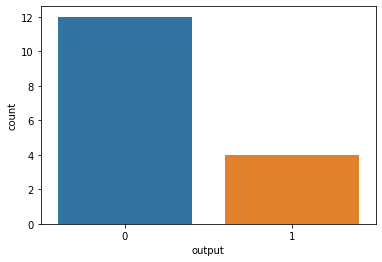

In [14]:
sns.countplot(df_symmetry['output'],label="Count")
plt.show()

In [15]:
feature_names = ['x1', 'x2', 'x3', 'x4']

X = df_symmetry[feature_names]
y = df_symmetry['output']

In [16]:
X.values
y=np.array(y, ndmin=2).T

In [17]:
gamma0=.1 #Input to Hidden
gamma1=.2 #Hidden to Output

no_hidden=3  #No of hidden nodes
no_inputs=4
no_outputs=1

def nonlin(x,deriv=False):
    sigmoid=1/(1+np.exp(-x))
    if(deriv==True):
        return sigmoid*(1-sigmoid)
    return sigmoid


np.random.seed(42)

# randomly initialize our weights with mean 0
w0 = 2*np.random.random((no_inputs,no_hidden)) - 1
w1 = 2*np.random.random((no_hidden,no_outputs)) - 1

print(w0)

for iter in range(30000):

	# Feed forward through layers 0, 1, and 2
    layer0 = X
    layer1 = nonlin(np.dot(layer0,w0))
    layer2 = nonlin(np.dot(layer1,w1))

    # Error Function
    layer2_error = y - layer2
    
    if (iter% 1000) == 0:
        print ("Error=", np.mean(np.abs(layer2_error)))
        
 #Gradients
    layer2_delta = layer2_error*nonlin(nonlin(np.dot(layer1,w1)),deriv=True)
    layer1_delta = layer2_delta.dot(w1.T)*nonlin(np.dot(layer0,w0),deriv=True)

    w1 += gamma1*layer1.T.dot(layer2_delta)
    w0 += gamma0*layer0.T.dot(layer1_delta)

print ("\n Output After Training:")
print (layer2)

[[-0.25091976  0.90142861  0.46398788]
 [ 0.19731697 -0.68796272 -0.68801096]
 [-0.88383278  0.73235229  0.20223002]
 [ 0.41614516 -0.95883101  0.9398197 ]]
Error= 0.4538914901838103
Error= 0.34675912033150075
Error= 0.23745199059527822
Error= 0.14324825996919138
Error= 0.1083231800588231
Error= 0.09281695985006916
Error= 0.08667276389202516
Error= 0.0838412970607605
Error= 0.08233014826842822
Error= 0.08112169956688148
Error= 0.07886757971536229
Error= 0.07316008464585186
Error= 0.0663900495391978
Error= 0.06013449183358596
Error= 0.05471335174799407
Error= 0.05007652697936706
Error= 0.04610535452752052
Error= 0.04268378627744008
Error= 0.03971378007738437
Error= 0.03711610294663073
Error= 0.03482752720140134
Error= 0.03279760642975773
Error= 0.030985886191975752
Error= 0.0293596875379664
Error= 0.02789239869986783
Error= 0.02656217084690022
Error= 0.025350922363657085
Error= 0.024243575281280114
Error= 0.023227465865050163
Error= 0.02229188619147429

 Output After Training:
[[8.92333

In [18]:
print (np.rint(layer2))

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


#### Look at the confusion matrix

In [19]:


output=np.rint(layer2)
confusion_matrix(output, y)

array([[12,  0],
       [ 0,  4]])

#### Evaluate some Test Set

In [20]:
X1 = np.array([[1,0,1,1]])

layer0 = X1
layer1 = nonlin(np.dot(layer0,w0))
layer2 = nonlin(np.dot(layer1,w1))

print(layer2)

[[0.00129893]]


# Example 5. Real-world applications (finally!) The UP College Admission Test  (UPCAT) Prediction.

Here is the actual class performance of more than 1000 students who took the UPCAT. The information contains the grades of each of the students in English, Math, and Science and their general weighted averages from grades 7-9. An IQ test conducted by the school is also made available together with a confidentially measured variable abbreviated as SA.  

Explore how accurately can a three-layer feedforward neural network can forecast UPCAT passers (pass=1, fail=0). Determine the optimal learning rate and architecture for generalization with an 80:20 split.

In [21]:
df_UPCAT = pd.read_excel('UPCAT_DATA2.xlsx', sheet_name='AllData', 
                        engine='openpyxl')
dummy = df_UPCAT
dummy.head()

,Batch,Eng7,Eng8,Eng9,Math7,Math8,Math9,Sci7,Sci8,Sci9,GWA7,GWA8,GWA9,UP,IQ,SA,C1,C2,Target
0,2005,77,82.0,86,94,87,92.0,84,80,92,1.4764,1.5045,1.4098,1,55.0,28,1,4.0,1
1,2005,57,57.0,59,55,46,57.0,53,45,53,2.6557,2.7000,2.7008,1,38.0,19,5,3.0,0
2,2005,55,52.0,55,57,53,51.0,57,62,51,2.6132,2.6818,2.7172,0,17.0,9,5,6.0,0
3,2005,69,78.0,78,87,79,79.0,83,82,79,1.7217,1.6136,1.7049,1,45.0,28,1,4.0,0
4,2005,64,71.0,68,71,57,54.0,60,59,55,2.4245,2.4318,2.4713,1,67.0,56,1,5.0,0


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


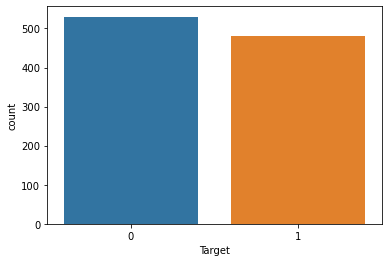

In [22]:
sns.countplot(df_UPCAT['Target'],label="Count")
plt.show()

In [23]:
dummy.columns

Index(['Batch', 'Eng7', 'Eng8', 'Eng9', 'Math7', 'Math8', 'Math9', 'Sci7',
       'Sci8', 'Sci9', 'GWA7', 'GWA8', 'GWA9', 'UP', 'IQ', 'SA', 'C1', 'C2',
       'Target'],
      dtype='object')

In [24]:
feature_names = ['Eng7', 'Eng8', 'Eng9', 'Math7', 'Math8', 'Math9', 'Sci7',
       'Sci8', 'Sci9', 'GWA7', 'GWA8', 'GWA9', 'UP', 'IQ', 'SA', 'C1', 'C2']

X = df_UPCAT[feature_names]
y = df_UPCAT['Target']


In [25]:
X.shape

(1010, 17)

In [26]:
X.insert(loc=0, column='biased', value=1.0)

In [27]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)



X_transition = pd.DataFrame(X)
X_clean = DataFrameImputer().fit_transform(X_transition)

X_clean.isnull().sum()

biased    0
Eng7      0
Eng8      0
Eng9      0
Math7     0
Math8     0
Math9     0
Sci7      0
Sci8      0
Sci9      0
GWA7      0
GWA8      0
GWA9      0
UP        0
IQ        0
SA        0
C1        0
C2        0
dtype: int64

In [28]:
X_clean.shape

(1010, 18)

In [29]:
from sklearn.preprocessing import MinMaxScaler
sscaler = MinMaxScaler()
X = sscaler.fit_transform(X_clean)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=217)

In [31]:
y=np.array(y_train, ndmin=2).T

In [32]:
import numpy as np
from sklearn.metrics import accuracy_score

X=X_train
y=y

gamma1=.001 #Input to hidden
gamma2=.0001 #Hidden to Output

no_hidden=10  #No of hidden nodes
no_inputs=18

def nonlin(x,deriv=False):
    sigmoid=1/(1+np.exp(-x))
    if(deriv==True):
        return sigmoid*(1-sigmoid)
    return sigmoid



np.random.seed(42)

# randomly initialize our weights with mean 0
w0 = 2*np.random.random((no_inputs,no_hidden)) - 1
w1 = 2*np.random.random((no_hidden,1)) - 1

#print(w0)

for iter in range(10000):

	# Feed forward through layers 0, 1, and 2
    layer0 = X
    layer1 = nonlin(np.dot(layer0,w0))
    layer2 = nonlin(np.dot(layer1,w1))

    # Error Function
    layer2_error = y - layer2
    

    if (iter% 500) == 0:
        #Check here the results
        layer0_test = X_test
        layer1_test = nonlin(np.dot(layer0_test,w0))
        layer2_test = nonlin(np.dot(layer1_test,w1))
        output=np.rint(layer2_test)
        print ("Iteration No.=",iter, "Train Set Error =",accuracy_score(np.rint(layer2), y), "Test Set=", accuracy_score(output, y_test))

        
        
 #Gradients
    layer2_delta = layer2_error*nonlin(np.dot(layer1,w1),deriv=True)
    layer1_delta = layer2_delta.dot(w1.T)*nonlin(np.dot(layer0,w0),deriv=True)

    w1 += gamma2*layer1.T.dot(layer2_delta)
    w0 += gamma1*layer0.T.dot(layer1_delta)

#print ("\n Output After Training:")
#print (layer2)



Iteration No.= 0 Train Set Error = 0.5033025099075297 Test Set= 0.48616600790513836
Iteration No.= 500 Train Set Error = 0.8401585204755614 Test Set= 0.8221343873517787
Iteration No.= 1000 Train Set Error = 0.8441215323645971 Test Set= 0.8300395256916996
Iteration No.= 1500 Train Set Error = 0.8507265521796565 Test Set= 0.8458498023715415
Iteration No.= 2000 Train Set Error = 0.8546895640686922 Test Set= 0.849802371541502
Iteration No.= 2500 Train Set Error = 0.8533685601056803 Test Set= 0.8616600790513834
Iteration No.= 3000 Train Set Error = 0.8546895640686922 Test Set= 0.8695652173913043
Iteration No.= 3500 Train Set Error = 0.8586525759577279 Test Set= 0.8853754940711462
Iteration No.= 4000 Train Set Error = 0.8612945838837517 Test Set= 0.8853754940711462
Iteration No.= 4500 Train Set Error = 0.8652575957727873 Test Set= 0.8853754940711462
Iteration No.= 5000 Train Set Error = 0.8652575957727873 Test Set= 0.8853754940711462
Iteration No.= 5500 Train Set Error = 0.8652575957727873 T

In [33]:
from sklearn.metrics import confusion_matrix

output=np.rint(layer2)
print(confusion_matrix(output, y_train))
print(accuracy_score(output, y_train))

[[345  44]
 [ 50 318]]
0.8758256274768824


In [34]:
layer0 = X_test
layer1 = nonlin(np.dot(layer0,w0))
layer2 = nonlin(np.dot(layer1,w1))


In [35]:
from sklearn.metrics import confusion_matrix


output=np.rint(layer2)
print("Confusion Matrix:")
print(confusion_matrix(output, y_test))

print("\n Accuracy:", accuracy_score(output, y_test))

Confusion Matrix:
[[118  11]
 [ 17 107]]

 Accuracy: 0.8893280632411067


Note that the above result is $\sim +3\%$ improvement from basic machine learning methods.

<img width="973" alt="UPCAT_ML1Results" src="https://user-images.githubusercontent.com/25600601/133045751-4fb3d1cd-3ff9-4877-9b01-344e66589f31.png">



#Example 6. (Home Exercise) Implement the above by combining the following activation functions: 

hidden =$\sin(x)$, output = $\frac{1}{1 + \exp(-x)}$  

See initial solution below as a guide.


In [36]:
X=X_train
y=y

gamma1=.03 
gamma2=.01 #Hidden to output

no_hidden=18  #No of hidden nodes
no_inputs=18


def nonlin(x,deriv=False):
    function=np.sin(x)
    if(deriv==True):
        return np.cos(x)
    return function

def nonlin2(x,deriv=False):
    sigmoid=1/(1+np.exp(-x))
    if(deriv==True):
        return sigmoid*(1-sigmoid)
    return sigmoid



np.random.seed(64)

# randomly initialize our weights with mean 0
w0 = 2*np.random.random((no_inputs,no_hidden)) - 1
w1 = 2*np.random.random((no_hidden,1)) - 1

#print(w0)

for iter in range(10000):

	# Feed forward through layers 0, 1, and 2
    layer0 = X
    layer1 = nonlin(np.dot(layer0,w0))
    layer2 = nonlin2(np.dot(layer1,w1))

    # Error Function
    layer2_error = y - layer2
    
    if (iter% 500) == 0:
        #Check here the results
        layer0_test = X_test
        layer1_test = nonlin(np.dot(layer0_test,w0))
        layer2_test = nonlin2(np.dot(layer1_test,w1))
        output=np.rint(layer2_test)
        print ("Iteration No.=",iter, "Train Set Error =",accuracy_score(np.rint(layer2), y), "Test Set Error =", accuracy_score(output, y_test))

    
        
 #Gradients
    layer2_delta = layer2_error*nonlin2(np.dot(layer1,w1),deriv=True)
    layer1_delta = layer2_delta.dot(w1.T)*nonlin(np.dot(layer0,w0),deriv=True)

    w1 += gamma2*layer1.T.dot(layer2_delta)
    w0 += gamma1*layer0.T.dot(layer1_delta)

#print ("\n Output After Training:")
#print (layer2)



Iteration No.= 0 Train Set Error = 0.618229854689564 Test Set Error = 0.5849802371541502
Iteration No.= 500 Train Set Error = 0.892998678996037 Test Set Error = 0.8616600790513834
Iteration No.= 1000 Train Set Error = 0.8982826948480845 Test Set Error = 0.8616600790513834
Iteration No.= 1500 Train Set Error = 0.9075297225891678 Test Set Error = 0.8537549407114624
Iteration No.= 2000 Train Set Error = 0.9101717305151915 Test Set Error = 0.849802371541502
Iteration No.= 2500 Train Set Error = 0.9141347424042272 Test Set Error = 0.83399209486166
Iteration No.= 3000 Train Set Error = 0.9062087186261559 Test Set Error = 0.8260869565217391
Iteration No.= 3500 Train Set Error = 0.9392338177014531 Test Set Error = 0.8300395256916996
Iteration No.= 4000 Train Set Error = 0.9484808454425363 Test Set Error = 0.8142292490118577
Iteration No.= 4500 Train Set Error = 0.9498018494055482 Test Set Error = 0.8181818181818182
Iteration No.= 5000 Train Set Error = 0.9498018494055482 Test Set Error = 0.818

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
output=np.rint(layer2)
print(confusion_matrix(output, y_train))
print(accuracy_score(output, y_train))

[[384   9]
 [ 11 353]]
0.9735799207397622


In [38]:
layer0 = X_test
layer1 = nonlin(np.dot(layer0,w0))
layer2 = nonlin2(np.dot(layer1,w1))

In [39]:
from sklearn.metrics import confusion_matrix

output=np.rint(layer2)
print(confusion_matrix(output, y_test))
print("Accuracy Test:", accuracy_score(output, y_test))

[[110  26]
 [ 25  92]]
Accuracy Test: 0.7984189723320159


# 4. Final Notes

Here are some of the main takeaways of our Backpropagation lecture:

1. Gradient-descent method is the most common method of supervised learning algorithms, from the basic regression methods to tree-based models like random forest and gradient boosting methods to neural network-based algorithms like perceptron networks and deep neural networks (Convolutional NN, LSTM, etc.).

2. Critical parameters demonstrated here include adding a bias node, choosing activation functions, and choosing architecture (number of layers/number of nodes). 

3. The mathematics of training a neural network has not evolved for generations. However, the algorithms have evolved exponentially. With better data (better resolution, better representation, more voluminous) and more powerful computers, NN-based AI is arguably one of the most disruptive technologies in Industry 4.0.  

# End